# Defining the Question

### a) Specifying the Question

Predict the customers that could show higher intent towards a recommended credit card.

### b) Defining the Metric for Success

This project will be considered successful if we are able to create a prediction model with an accuracy scorer of 80% or higher and use it to make predictions.

### c) Understanding the context 

Happy Customer Bank is a mid-sized private bank that deals in all kinds of banking products, like Savings accounts, Current accounts, investment products, credit products, among other offerings.

The bank also cross-sells products to its existing customers and to do so they use different kinds of communication like telecasting, e-mails, recommendations on net banking, mobile banking, etc.

In this case, the Happy Customer Bank wants to cross-sell its credit cards to its existing customers. The bank has identified a set of customers that are eligible for taking these credit cards.

Now, the bank is looking for your help in identifying customers that could show higher intent towards a recommended credit card, given the DATASET with the following variables:

ID : Unique Identifier for a row

Gender: Gender of the Customer

Age : Age of the Customer (in Years)

Region_Code : Code of the Region for the customers

Occupation : Occupation Type for the customer

Channel_Code : Acquisition Channel Code for the Customer (Encoded)

Vintage : Vintage for the Customer (In Months), Number of Days, Customer has been associated with the company

Credit_Product : If the Customer has any active credit product (Home loan, Personal loan, Credit Card etc.)

Avg_Account_Balance : Average Account Balance for the Customer in last 12 Months

Is_Active : If the Customer is Active in last 3 Months

Is_Lead(Target) : If the Customer is interested for the Credit Card, 0 / 1: Customer is not interested / interested

This dataset was part of May 2021 Jobathon conducted my analytics vidhya, for more info check:https://datahack.analyticsvidhya.com/contest/job-a-thon-2/
and https://www.kaggle.com/sajidhussain3/jobathon-may-2021-credit-card-lead-prediction 

### d) Recording the Experimental Design

1. Defining the Question
2. Reading the Data.
3. Checking the Data.
4. Data Cleaning
5. Performing EDA
6. Building Prediction Model
7. Evaluation of the solution
8. Challenging the solution 
9. Conclusion

### e) Data Relevance

This will be discussed after the analysis and prediction has been completed

# Data Preparation

### Importing our Libraries

In [ ]:
# installing the necessary libraries not in google colab
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

In [ ]:
# Let us first import all the libraries we will need for our analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import re
from matplotlib import pyplot as plt
%matplotlib inline
import pandas_profiling
from pandas_profiling import ProfileReport
from scipy import stats
from scipy.stats import norm
import math
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold, cross_val_score
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# let us set the warnings that may appear in our analysis off

import warnings
warnings.filterwarnings('ignore') 

# subsequently let us set the pandas warning for chained assignments off
pd.options.mode.chained_assignment = None  # default='warn'

### Loading and Previewing our Dataset

In [ ]:
# Loading the Dataset from the source i.e. csv
df_train = pd.read_csv('/content/train.csv')
df_train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [ ]:
# Loading the Dataset from the source i.e. csv
# We are missing the Is_Lead column in the test data set
df_test = pd.read_csv('/content/test.csv')
df_test.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


## Checking the Data

In [ ]:
# Determining the no. of records in our train dataset
#
print('This train dataset has ' + str(df_train.shape[0]) + ' rows, and ' + str(df_train.shape[1]) + ' columns')

This train dataset has 245725 rows, and 11 columns


In [ ]:
# Determining the no. of records in our test dataset
# We are missing the Is_Lead column in the test data set
print('This test dataset has ' + str(df_test.shape[0]) + ' rows, and ' + str(df_test.shape[1]) + ' columns')

This test dataset has 105312 rows, and 10 columns


In [ ]:
# Checking whether each column has an appropriate datatype
#
df_train.dtypes

ID                     object
Gender                 object
Age                     int64
Region_Code            object
Occupation             object
Channel_Code           object
Vintage                 int64
Credit_Product         object
Avg_Account_Balance     int64
Is_Active              object
Is_Lead                 int64
dtype: object

In [ ]:
# checking the dataset information
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [ ]:
# let us see the columns in our dataframe
print("***** Column names present in dataset *****")
df_train.columns

***** Column names present in dataset *****


Index(['ID', 'Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code',
       'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active',
       'Is_Lead'],
      dtype='object')

In [ ]:
# Checking the entire profile of the dataframe
profile = ProfileReport(df_train, title="Credit Card Profile Report", html={'style':{'full_width':True}})
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/24 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# let us save our profile report
profile.to_file(output_file="Titanic_Profile_Report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# let us see the unique values of all our columns
# so that we can separate out the category and numeric features
for i in df_train.columns:
    print("Number of unique {} are : {}".format(i,len(df_train[i].unique())))

Number of unique ID are : 245725
Number of unique Gender are : 2
Number of unique Age are : 63
Number of unique Region_Code are : 35
Number of unique Occupation are : 4
Number of unique Channel_Code are : 4
Number of unique Vintage are : 66
Number of unique Credit_Product are : 3
Number of unique Avg_Account_Balance are : 135292
Number of unique Is_Active are : 2
Number of unique Is_Lead are : 2


# Data Cleaning-Train Dataset

In [ ]:
# let us make a copy of our dataset to clean and do modelling on
df_copy = df_train.copy(deep = True)

In [ ]:
# For consistency, the column names should be uniform
# Let us change all column names to lower case
#
df_copy.columns = df_copy.columns.str.lower()
# Previewing the columns to confirm whether the changes have taken effect
#
df_copy.columns

Index(['id', 'gender', 'age', 'region_code', 'occupation', 'channel_code',
       'vintage', 'credit_product', 'avg_account_balance', 'is_active',
       'is_lead'],
      dtype='object')

In [ ]:
# From our profile report, we can see that we have no duplicated rows
# But let us check 
df_copy.duplicated().sum()

0

In [ ]:
# Let Us Drop the columns that do contribute to 
# whether a passenger survives or not 

df_copy.drop(['id'], axis=1, inplace=True)

# let us confirm that we have dropped the unnecessary columns
df_copy.head()

,gender,age,region_code,occupation,channel_code,vintage,credit_product,avg_account_balance,is_active,is_lead
0,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [ ]:
# let us check for missing values in our dataframe
null_list = list(df_copy.columns.values)

for n in null_list:
    print (n,": ",sum(pd.isnull(df_copy[n])))
#We have missing values in the credit product column

gender :  0
age :  0
region_code :  0
occupation :  0
channel_code :  0
vintage :  0
credit_product :  29325
avg_account_balance :  0
is_active :  0
is_lead :  0


In [ ]:
# let us see how much information we lose by dropping the null values
df_clean = df_copy.dropna()
print('Shape of dataframe with no missing values: ', df_clean.shape)
print('Shape of dataframe with missing values: ', df_copy.shape)
# by dropping our null values we have dropped an insignificant number rows of our dataframes

Shape of dataframe with no missing values:  (216400, 10)
Shape of dataframe with missing values:  (245725, 10)


# Data Cleaning-Test Dataset

In [ ]:
# let us make a copy of our dataset to clean and do modelling on
test_copy = df_test.copy(deep = True)

In [ ]:
# For consistency, the column names should be uniform
# Let us change all column names to lower case
#
test_copy.columns = test_copy.columns.str.lower()
# Previewing the columns to confirm whether the changes have taken effect
#
test_copy.columns

Index(['id', 'gender', 'age', 'region_code', 'occupation', 'channel_code',
       'vintage', 'credit_product', 'avg_account_balance', 'is_active'],
      dtype='object')

In [ ]:
# From our profile report, we can see that we have no duplicated rows
# But let us check 
test_copy.duplicated().sum()

0

In [ ]:
# Let Us Drop the columns that do contribute to 
# whether a passenger survives or not 

test_copy.drop(['id'], axis=1, inplace=True)

# # let us confirm that we have dropped the unnecessary columns
test_copy.head()

,gender,age,region_code,occupation,channel_code,vintage,credit_product,avg_account_balance,is_active
0,Male,29,RG254,Other,X1,25,Yes,742366,No
1,Male,43,RG268,Other,X2,49,NaN,925537,No
2,Male,31,RG270,Salaried,X1,14,No,215949,No
3,Male,29,RG272,Other,X1,33,No,868070,No
4,Female,29,RG270,Other,X1,19,No,657087,No


In [ ]:
# let us check for missing values in our dataframe
null_list = list(test_copy.columns.values)
for n in null_list:
    print (n,": ",sum(pd.isnull(test_copy[n])))
#We have missing values in the credit product column

gender :  0
age :  0
region_code :  0
occupation :  0
channel_code :  0
vintage :  0
credit_product :  12522
avg_account_balance :  0
is_active :  0


In [ ]:
# let us see how much information we lose by dropping the null values
test_clean = test_copy.dropna()
print('Shape of dataframe with no missing values: ', test_clean.shape)
print('Shape of dataframe with missing values: ', test_copy.shape)
# by dropping our null values we have dropped an insignificant number rows of our dataframe

Shape of dataframe with no missing values:  (92790, 9)
Shape of dataframe with missing values:  (105312, 9)


# Exploratory Data Analysis

In [ ]:
# let us see some info on our dataset
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216400 entries, 0 to 245724
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   gender               216400 non-null  object
 1   age                  216400 non-null  int64 
 2   region_code          216400 non-null  object
 3   occupation           216400 non-null  object
 4   channel_code         216400 non-null  object
 5   vintage              216400 non-null  int64 
 6   credit_product       216400 non-null  object
 7   avg_account_balance  216400 non-null  int64 
 8   is_active            216400 non-null  object
 9   is_lead              216400 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 18.2+ MB


In [ ]:
# let us see some summary statistics of the dataset
df_clean.describe()

,age,vintage,avg_account_balance,is_lead
count,216400.000000,216400.000000,2.164000e+05,216400.000000
mean,42.807315,44.285522,1.115086e+06,0.153942
std,14.850996,31.235351,8.500172e+05,0.360894
min,23.000000,7.000000,2.079000e+04,0.000000
25%,29.000000,20.000000,5.958438e+05,0.000000
50%,41.000000,31.000000,8.805390e+05,0.000000
75%,53.000000,67.000000,1.346543e+06,0.000000
max,85.000000,135.000000,1.035201e+07,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f291c8690d0>,
      dtype=object)

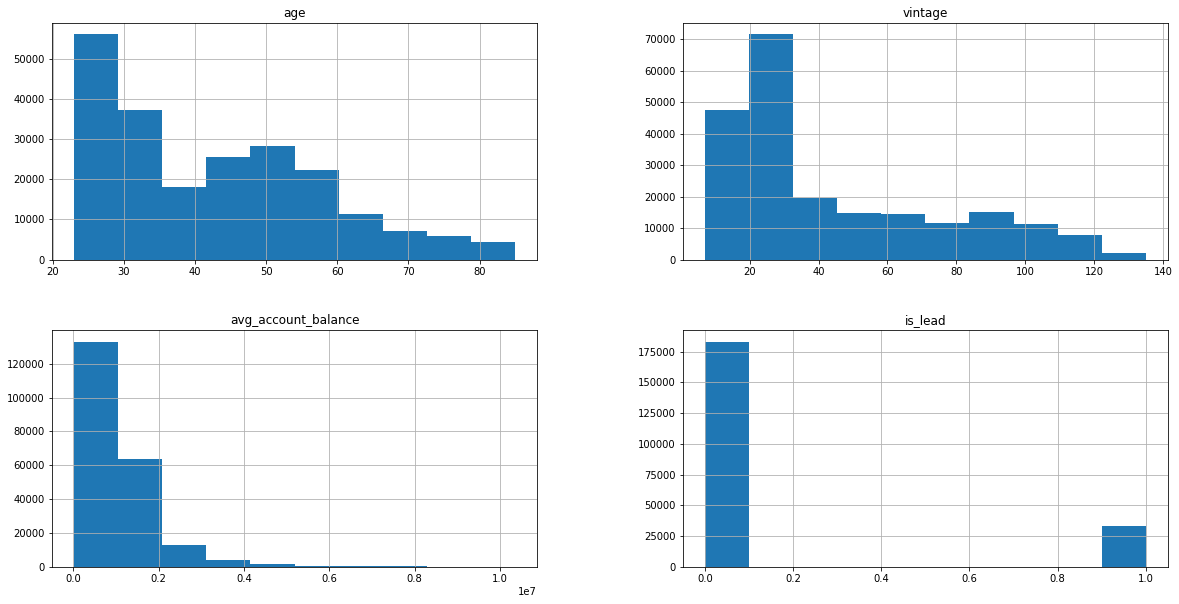

In [ ]:
# let us plot histograms to visualize patterns in the data
df_clean.hist(figsize = (20,10))

Text(0.5, 1.0, 'Checking for outliers using boxplots')

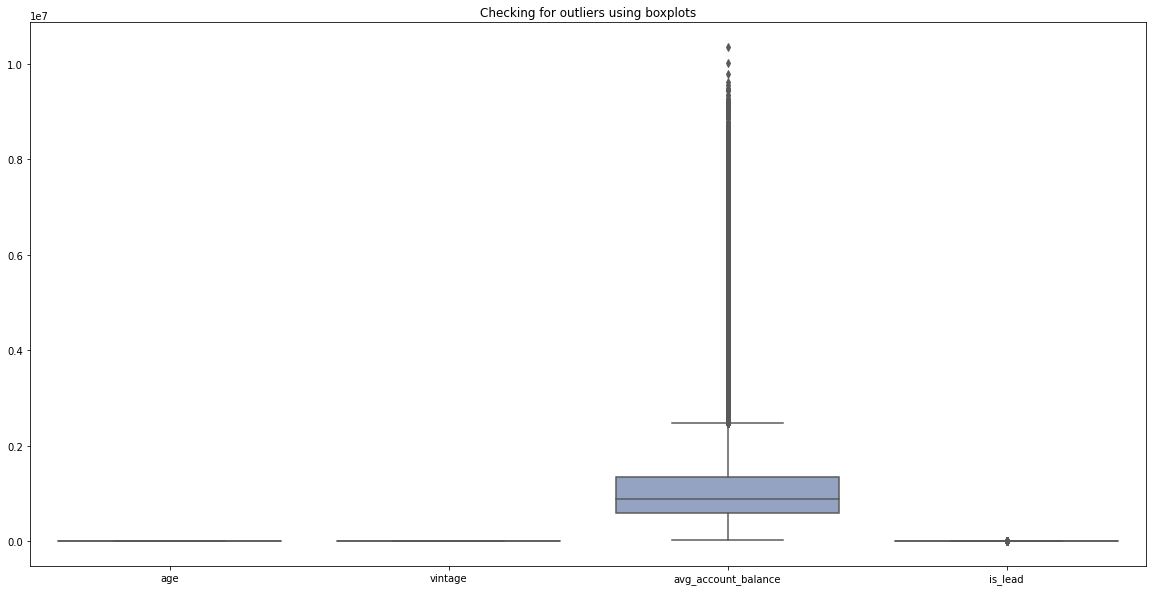

In [ ]:
# Boxplots to Visualize outliers of our numerical columns 
plt.figure(figsize = (20,10))
ax = sns.boxplot(data=df_clean, orient="v", palette="Set2")
plt.title('Checking for outliers using boxplots')
# The boxplots below indicate the outliers in each of the numerical columns

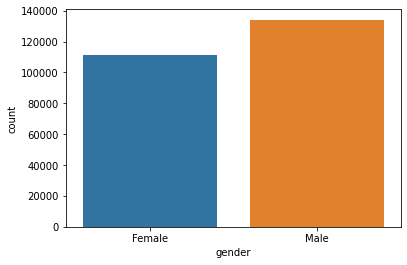

In [ ]:
# let us see how many men and women are in our dataset

sns.countplot(x="gender", data = df_copy)

# we can see that there are more males than females

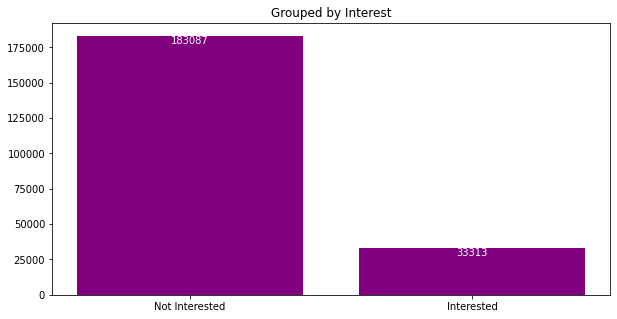

In [ ]:
# let us see how many customers are interested in a credit card
# and in the process Get info about balanced or imbalanced data set.
#Interested: 0 = No, 1 = Yes

int_count = df_clean.groupby('is_lead')['is_lead'].count()

plt.figure(figsize=(10,5))
plt.bar(int_count.index, int_count.values, color='purple')
plt.title('Grouped by Interest')
plt.xticks([0,1],['Not Interested', 'Interested'])
for i, value in enumerate(int_count.values):
    plt.text(i, value-70, str(value), fontsize=10, color='white',
             horizontalalignment='center', verticalalignment='top')
plt.show()

# most of the customers are not interested in credit cards 
# and our data is highly imbalanced

In [ ]:
def with_hue(data,feature,ax):
    
    #Numnber of categories
    num_of_cat=len([x for x in data[feature].unique() if x==x])
    
    bars=ax.patches
    
    for ind in range(num_of_cat):
        ##     Get every hue bar
        ##     ex. 8 X categories, 4 hues =>
        ##    [0, 8, 16, 24] are hue bars for 1st X category
        hueBars=bars[ind:][::num_of_cat] 
        # Get the total height (for percentages)
        total=sum([x.get_height() for x in hueBars])
        #Printing percentages on bar
        for bar in hueBars:
            percentage='{:.1f}%'.format(100 * bar.get_height()/total)
            ax.text(bar.get_x()+bar.get_width()/2.0,
                   bar.get_height(),
                   percentage,
                    ha="center",va="bottom",fontweight='bold',fontsize=14)
    

    
def without_hue(data,feature,ax):
    
    total=float(len(data))
    bars_plot=ax.patches
    
    for bars in bars_plot:
        percentage = '{:.1f}%'.format(100 * bars.get_height()/total)
        x = bars.get_x() + bars.get_width()/2.0
        y = bars.get_height()
        ax.text(x, y,(percentage,bars.get_height()),ha='center',fontweight='bold',fontsize=14)

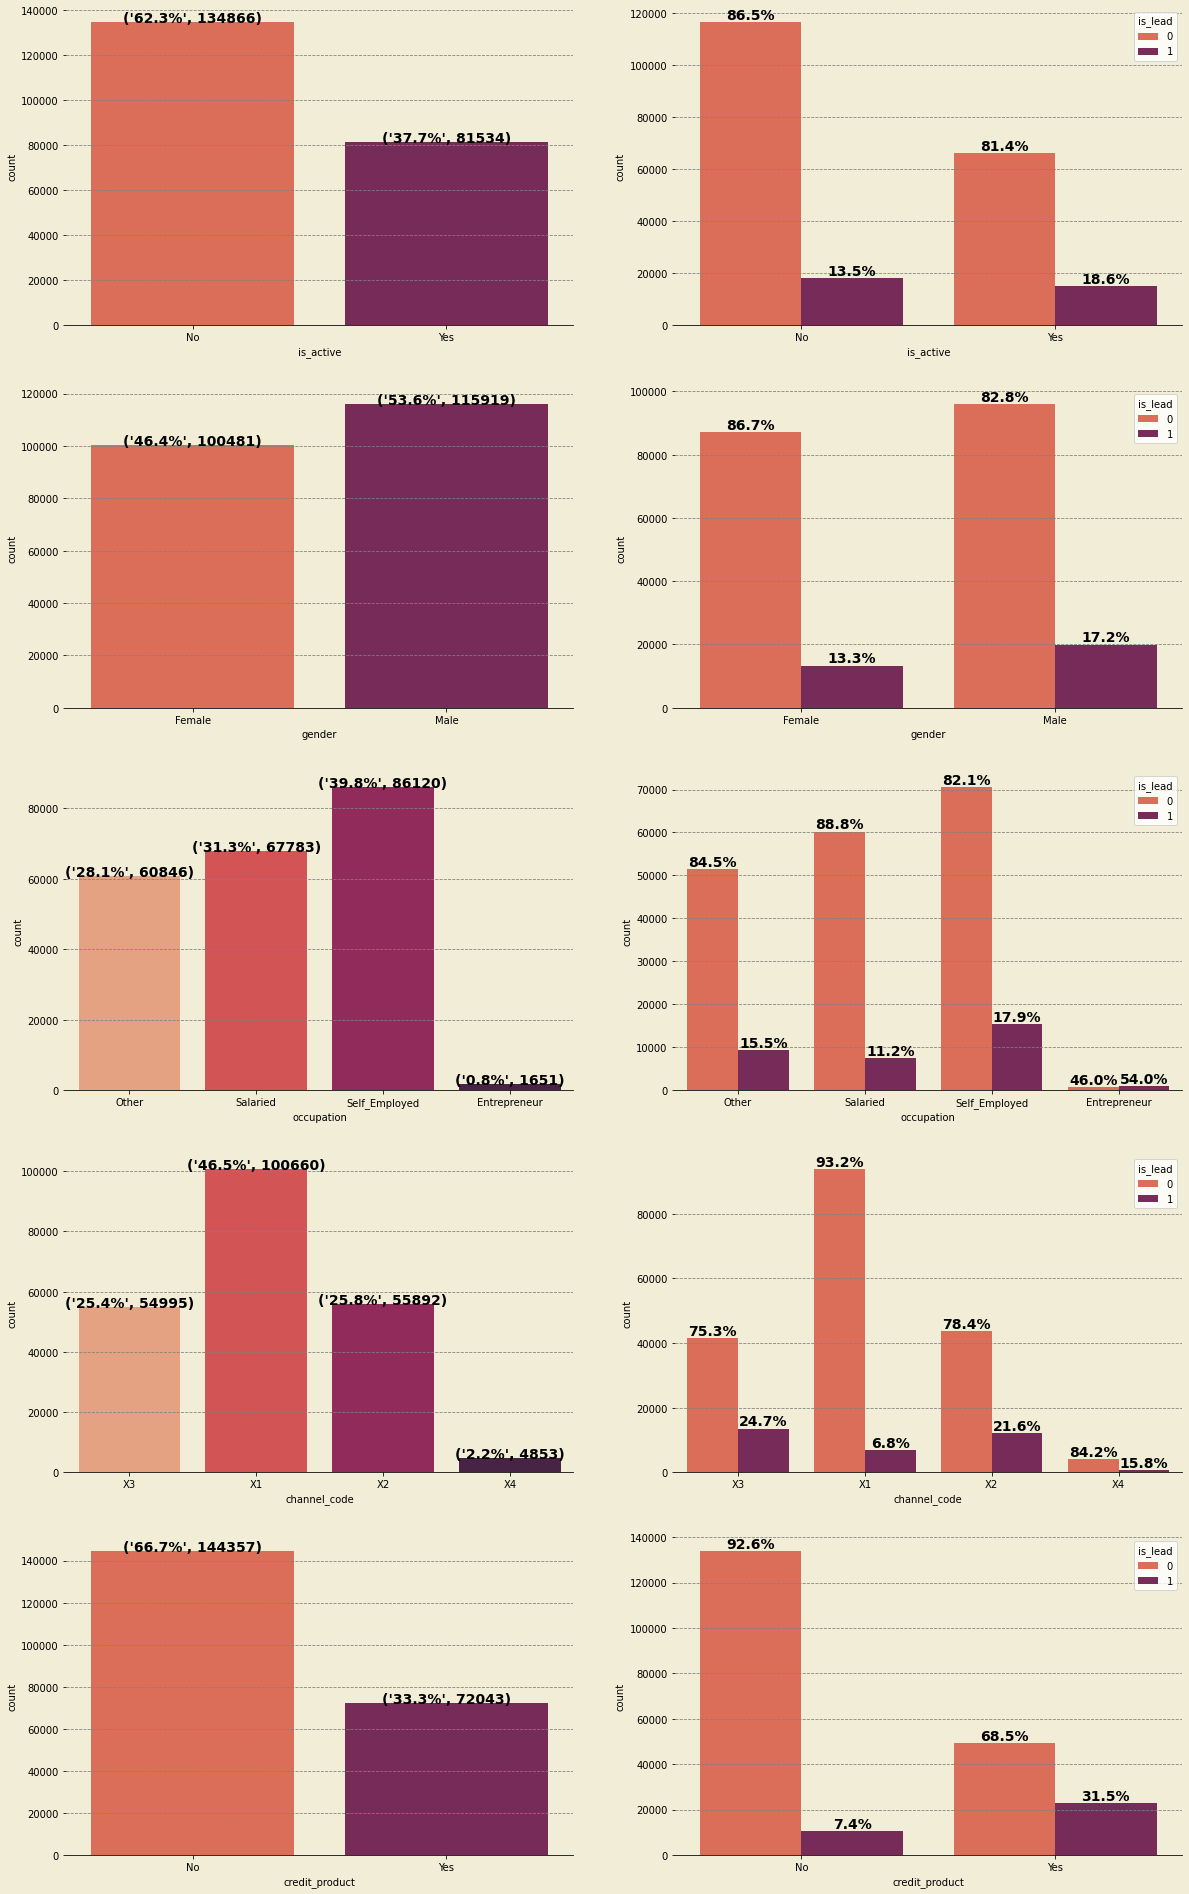

In [ ]:
# let us se how the other columns relate to our target column
nrows=5
ncols=2
f,ax=plt.subplots(nrows=nrows,ncols=ncols,figsize=(20,34))
columns=['gender','occupation', 'channel_code','credit_product', 'is_active']

f.patch.set_facecolor('#F2EDD7FF')

#Setting background and foreground color
for i in range(0,nrows):
  for j in range(0,ncols):
    ax[i][j].set_facecolor('#F2EDD7FF')
    ax[i][j].spines['top'].set_visible(False)
    ax[i][j].spines['right'].set_visible(False)
    ax[i][j].spines['left'].set_visible(False)
    ax[i][j].grid(linestyle="--",axis='y',color='gray')

    if (j==0):
      a1=sns.countplot(data=df_clean,x=columns[i-1],palette='rocket_r',ax=ax[i][j])
      without_hue(df_clean,columns[i-1],a1)
    elif (j==1):
      a2=sns.countplot(data=df_clean,x=columns[i-1],palette='rocket_r',ax=ax[i][j],hue="is_lead")
      with_hue(df_clean,columns[i-1],a2)

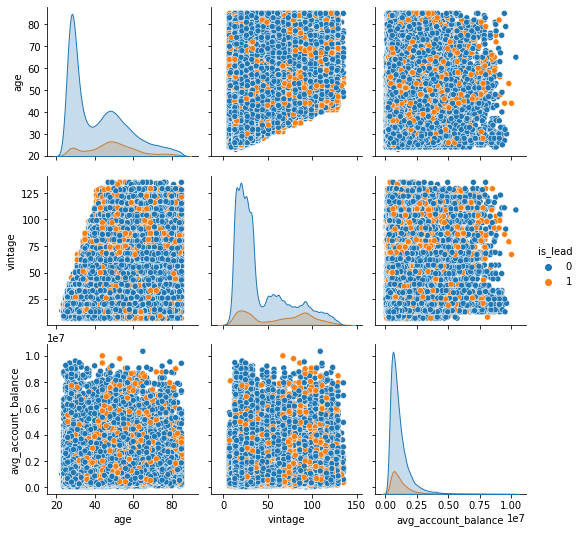

In [ ]:
# Ploting the bivariate summaries and recording our observations
sns.pairplot(df_clean, hue="is_lead")
plt.show()

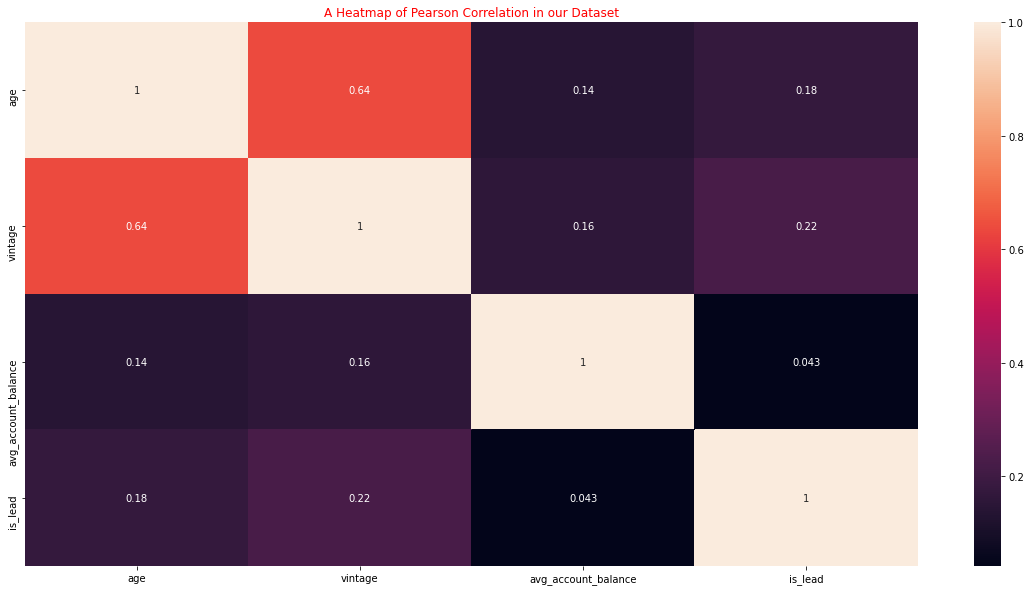

In [ ]:
# Calculating the pearson coefficient correlation
a = df_clean.corr() 
plt.figure(figsize = (20,10))
sns.heatmap(a, xticklabels=a.columns, yticklabels=a.columns, annot=True)
plt.title('A Heatmap of Pearson Correlation in our Dataset', color='red')
plt.show()
# From this we can see there is a correlation between t3 and tt4.

# EDA Conclusions

There are more males than females in our dataframe


# Feature Engineering

### extract age group from age column

In [ ]:
df_clean['age'].describe()

count    216400.000000
mean         42.807315
std          14.850996
min          23.000000
25%          29.000000
50%          41.000000
75%          53.000000
max          85.000000
Name: age, dtype: float64

In [ ]:
#we need to convert the ‘age’ feature to agegroups
data = [df_clean, test_clean]
for dataset in data:
    dataset['agegroup'] = dataset['age'].astype(int)
    dataset.loc[ dataset['agegroup'] <= 22, 'age'] = 0
    dataset.loc[(dataset['agegroup'] > 23) & (dataset['agegroup'] <= 30), 'agegroup'] = 1
    dataset.loc[(dataset['agegroup'] > 31) & (dataset['agegroup'] <= 40), 'agegroup'] = 2
    dataset.loc[(dataset['agegroup'] > 41) & (dataset['agegroup'] <= 50), 'agegroup'] = 3
    dataset.loc[(dataset['agegroup'] > 51) & (dataset['agegroup'] <= 60), 'agegroup'] = 4
    dataset.loc[(dataset['agegroup'] > 61) & (dataset['agegroup'] <= 70), 'agegroup'] = 5
    dataset.loc[(dataset['agegroup'] > 71) & (dataset['agegroup'] <= 80), 'agegroup'] = 6
    dataset.loc[ dataset['agegroup'] > 81, 'agegroup'] = 7
# let's see how it's distributed 
print(df_clean['agegroup'].value_counts())
print(test_clean['agegroup'].value_counts())

1     66978
3     40590
2     32921
4     30956
5     13966
6      8516
31     8225
51     4669
41     3286
61     2316
7      2161
71     1128
81      687
23        1
Name: agegroup, dtype: int64
1     28747
3     17615
2     14019
4     13070
5      6016
6      3704
31     3484
51     1973
41     1463
7       987
61      927
71      499
81      286
Name: agegroup, dtype: int64


In [ ]:
# let us drop the age column cause we have age groups now
df_clean.drop(['age'],axis=1,inplace=True)
test_clean.drop(['age'],axis=1,inplace=True)

# Data Preprocessing

In [ ]:
#multicollinearity
#multicollinearity test
# Let's display the correlations between the variables
correlations = df_clean.corr()

correlations

,vintage,avg_account_balance,is_lead,agegroup
vintage,1.000000,0.159411,0.223750,0.153083
avg_account_balance,0.159411,1.000000,0.042533,0.035108
is_lead,0.223750,0.042533,1.000000,0.040958
agegroup,0.153083,0.035108,0.040958,1.000000


In [ ]:
#VIF test
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,vintage,avg_account_balance,is_lead,agegroup
vintage,1.101228,-0.160239,-0.233302,-0.153398
avg_account_balance,-0.160239,1.026249,-0.007337,-0.011199
is_lead,-0.233302,-0.007337,1.052806,-0.007149
agegroup,-0.153398,-0.011199,-0.007149,1.024169


In [ ]:
#it's time to transform all variables into numeric ones. 
#because machine learning models generally take numeric input
#Label Encoding
final_train = df_clean.copy(deep=True)
label_encode=LabelEncoder()
columns1=['gender', 'is_active','occupation', 'channel_code','credit_product','region_code']
final_train[columns1]=final_train[columns1].apply(label_encode.fit_transform)
final_train.head()

,gender,region_code,occupation,channel_code,vintage,credit_product,avg_account_balance,is_active,is_lead,agegroup
0,0,18,1,2,43,0,1045696,0,0,6
1,0,27,2,0,32,0,581988,0,0,1
2,0,18,3,2,26,0,1484315,1,0,4
3,1,20,2,0,19,0,470454,0,0,2
4,0,32,2,0,33,0,886787,0,0,1


In [ ]:
#Label Encoding for test data
final_test = test_clean.copy(deep=True)
label_encode=LabelEncoder()
columns1=['gender', 'is_active','occupation', 'channel_code','credit_product','region_code']
final_test[columns1]=final_test[columns1].apply(label_encode.fit_transform)
final_test.head()

,gender,region_code,occupation,channel_code,vintage,credit_product,avg_account_balance,is_active,agegroup
0,1,4,1,0,25,1,742366,0,1
2,1,20,2,0,14,0,215949,0,31
3,1,22,1,0,33,0,868070,0,1
4,0,20,1,0,19,0,657087,0,1
5,1,18,3,2,110,0,4624262,0,4


In [ ]:
print(final_test.shape)
print(final_train.shape)

(92790, 9)
(216400, 10)


# Modeling Time

since our data is highly imbalanced we will use resampling techniques to balance the data.

The simplest implementation of over-sampling is to duplicate random records from the minority class, which can cause overfishing.

In under-sampling, the simplest technique involves removing random records from the majority class, which can cause loss of information.

##### Compare Algorithms without resampling

In [ ]:
# Installing catboost
!pip install catboost

In [ ]:
from matplotlib import pyplot
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [ ]:
# compare algorithms
# Declaring our X and y variables
X = final_train.drop('is_lead', axis=1)
y = final_train.is_lead

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

#scale the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)

# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('GBC', GradientBoostingClassifier()))
models.append(('NB', GaussianNB()))
#models.append(('SVM', SVC(gamma='auto')))

# evaluate each model in turn

results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.769150 (0.007446)
LDA: 0.768434 (0.007483)
KNN: 0.715421 (0.006247)
DTC: 0.612543 (0.004746)
RF: 0.763987 (0.005598)
GBC: 0.801200 (0.006547)
NB: 0.751725 (0.005953)


##### Compare Algorithms - Oversampling

In [ ]:
# compare algorithms
# Declaring our X and y variables
X = final_train.drop('is_lead', axis=1)
y = final_train.is_lead

# oversampling
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X, y = ros.fit_sample(X, y)

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

# #scale the data
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train) 
# X_test = sc.transform(X_test)

# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('GBC', GradientBoostingClassifier()))
models.append(('NB', GaussianNB()))
# models.append(('SVM', SVC(gamma='auto')))

# evaluate each model in turn

results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.637271 (0.002824)
LDA: 0.769365 (0.003014)
KNN: 0.810401 (0.002256)
DTC: 0.907753 (0.001308)
RF: 0.987381 (0.000592)
GBC: 0.802277 (0.003227)
NB: 0.655337 (0.003318)


##### Compare Algorithms - Undersampling

In [ ]:
# compare algorithms
# Declaring our X and y variables
X = final_train.drop('is_lead', axis=1)
y = final_train.is_lead

# undersampling
from imblearn.under_sampling import RandomUnderSampler
ros = RandomUnderSampler()
X, y = ros.fit_sample(X, y)

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

#scale the data
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train) 
# X_test = sc.transform(X_test)

# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('GBC', GradientBoostingClassifier()))
models.append(('NB', GaussianNB()))
# models.append(('SVM', SVC(gamma='auto')))

# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.634689 (0.009200)
LDA: 0.768155 (0.004929)
KNN: 0.517211 (0.011177)
CART: 0.634515 (0.006968)
RF: 0.770555 (0.003616)
GBC: 0.801269 (0.005688)
NB: 0.652051 (0.008840)


In [ ]:
# oversampling works best 

### Random Forest

In [ ]:
# Declaring our X and y variables
X = final_train.drop('is_lead', axis=1)
y = final_train.is_lead

# oversampling
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X, y = ros.fit_sample(X, y)

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

#scale the data
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train) 
# X_test = sc.transform(X_test)

rfc = RandomForestClassifier(random_state=101)
# Train a model

rfc.fit(X_train, y_train)

# Make predictions
y_pred = rfc.predict(X_test)



# printing the accuracy using accuracy score
print(roc_auc_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Making predictions for our train dataset
y_pred_train = rfc.predict(X_train)

# Measuring the accuracy of the model on the train dataset
print('\n')
print(f'The area under curve score for our train dataset is: {roc_auc_score(y_train, y_pred_train)}')
print(f'The f1 score for our train dataset is {f1_score(y_train, y_pred_train)}')
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

0.9322837624659777
              precision    recall  f1-score   support

           0       0.99      0.87      0.93     55271
           1       0.89      0.99      0.94     54582

    accuracy                           0.93    109853
   macro avg       0.94      0.93      0.93    109853
weighted avg       0.94      0.93      0.93    109853



The area under curve score for our train dataset is: 0.9999648141142701
The f1 score for our train dataset is 0.9999649828610558
[[127808      8]
 [     1 128504]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    127816
           1       1.00      1.00      1.00    128505

    accuracy                           1.00    256321
   macro avg       1.00      1.00      1.00    256321
weighted avg       1.00      1.00      1.00    256321



In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

# Declaring our X and y variables
X = final_train.drop('is_lead', axis=1)
y = final_train.is_lead

# oversampling
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X, y = ros.fit_sample(X, y)

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

#scale the data
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train) 
# X_test = sc.transform(X_test)

rfc = RandomForestClassifier(random_state=101)
# Train a model

rfc.fit(X_train, y_train)

# Make predictions
y_pred = rfc.predict(X_test)
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(rfc, X, y, scoring='roc_auc', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Auc: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Auc: 0.997 (0.000)


### Catboost

In [ ]:
# Declaring our X and y variables
X = final_train.drop('is_lead', axis=1)
y = final_train.is_lead

# # oversampling to deal with class imbalance
# from imblearn.over_sampling import SMOTE
# oversample = SMOTE()
# X, y = oversample.fit_resample(X, y)

# oversampling

ros = RandomOverSampler()
X, y = ros.fit_sample(X, y)

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

#scale the data
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train) 
# X_test = sc.transform(X_test)

from catboost import CatBoostClassifier

cb = CatBoostClassifier(iterations=60, depth=8, learning_rate=0.01)
# Train a model

cb.fit(X_train, y_train)

# Make predictions
y_pred = cb.predict(X_test)

# Check score
print(roc_auc_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Making predictions for our train dataset
y_pred_train = cb.predict(X_train)

# Measuring the accuracy of the model on the train dataset
print('\n')
print(f'The auc score for our train dataset is: {roc_auc_score(y_train, y_pred_train)}')
print(f'The f1 score for our train dataset is {f1_score(y_train, y_pred_train)}')
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

0:	learn: 0.6905022	total: 122ms	remaining: 7.22s
1:	learn: 0.6879141	total: 181ms	remaining: 5.25s
2:	learn: 0.6856102	total: 226ms	remaining: 4.3s
3:	learn: 0.6831087	total: 287ms	remaining: 4.02s
4:	learn: 0.6806645	total: 350ms	remaining: 3.85s
5:	learn: 0.6782716	total: 408ms	remaining: 3.67s
6:	learn: 0.6760562	total: 466ms	remaining: 3.53s
7:	learn: 0.6738119	total: 524ms	remaining: 3.41s
8:	learn: 0.6716905	total: 585ms	remaining: 3.32s
9:	learn: 0.6694435	total: 644ms	remaining: 3.22s
10:	learn: 0.6672407	total: 702ms	remaining: 3.13s
11:	learn: 0.6650580	total: 760ms	remaining: 3.04s
12:	learn: 0.6629559	total: 821ms	remaining: 2.97s
13:	learn: 0.6609946	total: 878ms	remaining: 2.88s
14:	learn: 0.6591691	total: 922ms	remaining: 2.77s
15:	learn: 0.6571278	total: 988ms	remaining: 2.71s
16:	learn: 0.6552000	total: 1.05s	remaining: 2.65s
17:	learn: 0.6532818	total: 1.1s	remaining: 2.58s
18:	learn: 0.6513637	total: 1.16s	remaining: 2.51s
19:	learn: 0.6495139	total: 1.22s	remaining

### LGBM

In [ ]:
# Declaring our X and y variables
X = final_train.drop('is_lead', axis=1)
y = final_train.is_lead

# # oversampling to deal with class imbalance
# from imblearn.over_sampling import SMOTE
# oversample = SMOTE()
# X, y = oversample.fit_resample(X, y)

# oversampling
# from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X, y = ros.fit_sample(X, y)

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

#scale the data
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train) 
# X_test = sc.transform(X_test)

from lightgbm import LGBMClassifier
# Train a model
model = LGBMClassifier(random_state=0, learning_rate= 0.01, n_estimators= 8, num_leaves= 16)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Check score
# Check score
print(roc_auc_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Making predictions for our train dataset
y_pred_train = model.predict(X_train)

# Measuring the accuracy of the model on the train dataset
print('\n')
print(f'The auc score for our train dataset is: {roc_auc_score(y_train, y_pred_train)}')
print(f'The f1 score for our train dataset is {f1_score(y_train, y_pred_train)}')
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

0.7343631571289589
0.7343085760061173
              precision    recall  f1-score   support

           0       0.74      0.73      0.73     55271
           1       0.73      0.74      0.74     54582

    accuracy                           0.73    109853
   macro avg       0.73      0.73      0.73    109853
weighted avg       0.73      0.73      0.73    109853



The auc score for our train dataset is: 0.734272996567619
The f1 score for our train dataset is 0.7368799258229021
[[92848 34968]
 [33138 95367]]
              precision    recall  f1-score   support

           0       0.74      0.73      0.73    127816
           1       0.73      0.74      0.74    128505

    accuracy                           0.73    256321
   macro avg       0.73      0.73      0.73    256321
weighted avg       0.73      0.73      0.73    256321



In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = LGBMClassifier(random_state=0)
# evaluate model
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
# report performance
print('Auc: %.3f (%.3f)' % (mean(scores), std(scores)))

Auc: 0.814 (0.002)


### XGB


In [ ]:
# Declaring our X and y variables
X = final_train.drop('is_lead', axis=1)
y = final_train.is_lead

# # oversampling to deal with class imbalance
# from imblearn.over_sampling import SMOTE
# oversample = SMOTE()
# X, y = oversample.fit_resample(X, y)

# oversampling


ros = RandomOverSampler()
X, y = ros.fit_sample(X, y)
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

#scale the data
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train) 
# X_test = sc.transform(X_test)


xc = XGBClassifier(random_state=101)
# Train a model

xc.fit(X_train, y_train)

# Make predictions
y_pred = xc.predict(X_test)

# Check score
print(roc_auc_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Making predictions for our train dataset
y_pred_train = xc.predict(X_train)

# Measuring the accuracy of the model on the train dataset
print('\n')
print(f'The auc score for our train dataset is: {roc_auc_score(y_train, y_pred_train)}')
print(f'The f1 score for our train dataset is {f1_score(y_train, y_pred_train)}')
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

0.7408483127019376
0.7408627893639682
              precision    recall  f1-score   support

           0       0.74      0.74      0.74     55271
           1       0.74      0.74      0.74     54582

    accuracy                           0.74    109853
   macro avg       0.74      0.74      0.74    109853
weighted avg       0.74      0.74      0.74    109853



The auc score for our train dataset is: 0.74095312276952
The f1 score for our train dataset is 0.7407679244178101
[[95048 32768]
 [33633 94872]]
              precision    recall  f1-score   support

           0       0.74      0.74      0.74    127816
           1       0.74      0.74      0.74    128505

    accuracy                           0.74    256321
   macro avg       0.74      0.74      0.74    256321
weighted avg       0.74      0.74      0.74    256321



### Logistic

In [ ]:
# Declaring our X and y variables
X = final_train.drop('is_lead', axis=1)
y = final_train.is_lead

# # oversampling to deal with class imbalance
ros = RandomOverSampler()
X, y = ros.fit_sample(X, y)

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

#scale the data
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train) 
# X_test = sc.transform(X_test)

from sklearn.linear_model import LogisticRegression
# create instance of logistic regression
logmodel = LogisticRegression()

# fit the model
logmodel.fit(X_train, y_train)

# make predictions
y_pred = logmodel.predict(X_test)

# printing the accuracy using accuracy score
print(roc_auc_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Making predictions for our train dataset
y_pred_train = xc.predict(X_train)

# Measuring the accuracy of the model on the train dataset
print('\n')
print(f'The auc score for our train dataset is: {roc_auc_score(y_train, y_pred_train)}')
print(f'The f1 score for our train dataset is {f1_score(y_train, y_pred_train)}')
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

0.5
0.4968639909697505
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     55271
           1       0.50      1.00      0.66     54582

    accuracy                           0.50    109853
   macro avg       0.25      0.50      0.33    109853
weighted avg       0.25      0.50      0.33    109853



The auc score for our train dataset is: 0.7411282132329261
The f1 score for our train dataset is 0.7409891096451852
[[95048 32768]
 [33588 94917]]
              precision    recall  f1-score   support

           0       0.74      0.74      0.74    127816
           1       0.74      0.74      0.74    128505

    accuracy                           0.74    256321
   macro avg       0.74      0.74      0.74    256321
weighted avg       0.74      0.74      0.74    256321



### GBC

In [ ]:
# Declaring our X and y variables
X = final_train.drop('is_lead', axis=1)
y = final_train.is_lead

# # oversampling to deal with class imbalance
ros = RandomOverSampler()
X, y = ros.fit_sample(X, y)

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

#scale the data
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train) 
# X_test = sc.transform(X_test)

# Instantiating the model
gbc = GradientBoostingClassifier()
gbc = gbc.fit(X_train, y_train)

# Making predictions for our test dataset
y_pred_gbc = gbc.predict(X_test)

# Measuring the accuracy of the model on the test dataset
# printing the accuracy using accuracy score
print(roc_auc_score(y_test, y_pred_gbc))
print(accuracy_score(y_test, y_pred_gbc))
print(classification_report(y_test, y_pred_gbc))

# Making predictions for our train dataset
y_pred_gbc_train = gbc.predict(X_train)

# Measuring the accuracy of the model on the train dataset
print('\n')
print(f'The auc score for our train dataset is: {roc_auc_score(y_train, y_pred_gbc_train)}')
print(f'The f1 score for our train dataset is {f1_score(y_train, y_pred_gbc_train)}')
print(confusion_matrix(y_train, y_pred_gbc_train))
print(classification_report(y_test, y_pred))

0.7411052642922086
0.7411176754389958
              precision    recall  f1-score   support

           0       0.74      0.74      0.74     55271
           1       0.74      0.74      0.74     54582

    accuracy                           0.74    109853
   macro avg       0.74      0.74      0.74    109853
weighted avg       0.74      0.74      0.74    109853



The auc score for our train dataset is: 0.7413825269468513
The f1 score for our train dataset is 0.7411731173937318
[[95115 32701]
 [33590 94915]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     55271
           1       0.50      1.00      0.66     54582

    accuracy                           0.50    109853
   macro avg       0.25      0.50      0.33    109853
weighted avg       0.25      0.50      0.33    109853



# Testing

In [ ]:
# from the tests above, random forest has performed the best 
# with an AUC_ROC score of 93.2%

In [ ]:
### predict on the test data
test_predictions = rfc.predict(final_test)
submission_df = pd.DataFrame()
submission_df["ID"] = df_test["id"]
submission_df["Is_Lead"] = test_predictions
# file
submission_df.to_csv("credit_card_random.csv", index=False)